In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install q tensorflow==2.1
!pip install q keras==2.3.1
# Resolving: AttributeError: 'str' object has no attribute 'decode'
!pip uninstall h5py
!pip install h5py==2.10.0

     |███████████████████████████▎    | 359.9 MB 1.6 MB/s eta 0:00:39

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit
import cv2
import albumentations as albu
from skimage.transform import resize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
import keras
from keras.models import Sequential, load_model
from keras.layers import Dropout, Dense, GlobalAveragePooling2D
from keras.optimizers import Adam

!pip install -U segmentation-models
import efficientnet.keras as efn

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
height = 224
width = 224
channels = 3
input_shape = (height, width, channels)

n_classes = 8

In [17]:
tf.keras.backend.clear_session()

In [18]:
efnb0 = efn.EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape, classes=n_classes)

model = Sequential()
model.add(efnb0)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b0 (Model)      (None, 7, 7, 1280)        4049564   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 10248     
Total params: 4,059,812
Trainable params: 4,017,796
Non-trainable params: 42,016
_________________________________________________________________


In [19]:
# Directory with our training pictures
train_dir = '/content/drive/MyDrive/Major Project/Currency Notes Recognition/final_dataset/training'

# Directory with our validation pictures
validation_dir = '/content/drive/MyDrive/Major Project/Currency Notes Recognition/final_dataset/validation'

In [20]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 45,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   shear_range = 0.2,
                                   zoom_range = 0.1,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'categorical', 
                                                    target_size = (224, 224))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'categorical', 
                                                          target_size = (224, 224))

Found 7833 images belonging to 8 classes.
Found 536 images belonging to 8 classes.


In [21]:
optimizer = Adam(lr=0.0001)

#early stopping to monitor the validation loss and avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

#reducing learning rate on plateau
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience= 5, factor= 0.5, min_lr= 1e-6, verbose=1)

#model compiling
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])

In [22]:
filepath = '/content/drive/MyDrive/Major Project/Currency Notes Recognition/Trained Model/model_5.h5'

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

model_history = model.fit(train_generator, 
                          validation_data = validation_generator, 
                          callbacks = [early_stop,checkpoint],
                          verbose = 1, 
                          epochs = 20)

#saving the trained model weights as data file in .h5 format
model.save_weights("/content/drive/MyDrive/Major Project/Currency Notes Recognition/Trained Model/cifar_efficientnetb0_weights_2.h5")

Epoch 1/10
391/392 [============================>.] - ETA: 6s - loss: 0.8652 - acc: 0.7266 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


392/392 [==============================] - 2522s 6s/step - loss: 0.8633 - acc: 0.7273 - val_loss: 0.0450 - val_acc: 0.9571

Epoch 00001: val_acc improved from -inf to 0.95709, saving model to /content/drive/MyDrive/Major Project/Currency Notes Recognition/Trained Model/model_4.h5


/usr/local/lib/python3.7/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


Epoch 2/10
392/392 [==============================] - 529s 1s/step - loss: 0.1383 - acc: 0.9648 - val_loss: 0.0077 - val_acc: 0.9907

Epoch 00002: val_acc improved from 0.95709 to 0.99067, saving model to /content/drive/MyDrive/Major Project/Currency Notes Recognition/Trained Model/model_4.h5
Epoch 3/10
392/392 [==============================] - 516s 1s/step - loss: 0.0620 - acc: 0.9856 - val_loss: 0.0029 - val_acc: 0.9925

Epoch 00003: val_acc improved from 0.99067 to 0.99254, saving model to /content/drive/MyDrive/Major Project/Currency Notes Recognition/Trained Model/model_4.h5
Epoch 4/10
392/392 [==============================] - 526s 1s/step - loss: 0.0451 - acc: 0.9889 - val_loss: 0.0305 - val_acc: 0.9925

Epoch 00004: val_acc did not improve from 0.99254
Epoch 5/10
392/392 [==============================] - 530s 1s/step - loss: 0.0329 - acc: 0.9920 - val_loss: 0.0012 - val_acc: 0.9925

Epoch 00005: val_acc did not improve from 0.99254
Epoch 6/10
392/392 [========================

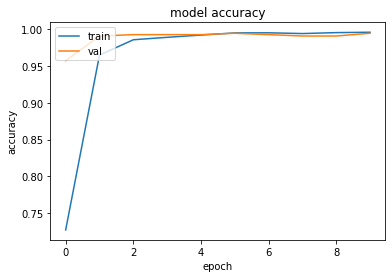

In [23]:
from matplotlib import pyplot as plt
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()